# Clustering over Spotify DataSet

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data set
df = pd.read_csv('spotify_dataset.csv')

df.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_genres,artist_popularity,artist_followers,release_year
0,Matador,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,['cumbia villera'],45,68434,2007
1,Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,"['argentine rock', ' latin alternative', ' lat...",67,2633939,1993
2,El Campanero,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,['cumbia villera'],45,68434,2007
3,Chacarera Del Sufrido,Raly Barrionuevo,El Sueño De Los Viajeros,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,"['argentine rock', ' folclore santiagueno', ' ...",51,169413,2015
4,Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,['folklore argentino'],25,5212,2006


### Cleaning

In this section, we are going to:

1. Managing Nan values
2. Encode the genres feature.
3. Drop features that won't be used during the clustering process.
4. Normalizing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_name          291 non-null    object 
 1   artist             291 non-null    object 
 2   album              291 non-null    object 
 3   danceability       291 non-null    float64
 4   energy             291 non-null    float64
 5   key                291 non-null    int64  
 6   loudness           291 non-null    float64
 7   mode               291 non-null    int64  
 8   speechiness        291 non-null    float64
 9   acousticness       291 non-null    float64
 10  instrumentalness   291 non-null    float64
 11  liveness           291 non-null    float64
 12  valence            291 non-null    float64
 13  tempo              291 non-null    float64
 14  duration_ms        291 non-null    int64  
 15  song_popularity    291 non-null    int64  
 16  artist_genres      291 non

As there is no missing data, there is no need to handle Nan values.

#### Encoding the Genres columns

As there is up to 300 different genres in the dataset. 

I will get the more relevant ones and perform an encoding based on them.

In [4]:
import ast


# Create an empty list to store all the genres
all_genres = []

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    # Iterate over each genre in the list and add it to the all_genres list
    for genre in genre_list:
        if genre not in all_genres:
            all_genres.append(genre)

# Print the list of all genres
print(all_genres)
print(len(all_genres))

['cumbia villera', 'argentine rock', ' latin alternative', ' latin rock', ' rock en espanol', ' ska argentino', ' folclore santiagueno', ' folklore argentino', ' rock nacional', 'folklore argentino', ' folclore salteno', 'orquesta tipica', ' tango', ' vintage tango', 'latin classical', ' cantautor', ' trova', 'chamame', ' folclore tucumano', ' zamba', 'argentine heavy metal', ' argentine metal', ' argentine rock', ' latin metal', '[]', ' post-punk argentina', 'cumbia andina mexicana', ' folclore jujeno', 'latin pop', ' modern salsa', ' salsa', ' tropical', 'dominican pop', ' merengue', ' rumba', ' spanish pop', ' spanish pop rock', ' musica andina chilena', ' nueva cancion', 'hi-nrg', ' new romantic', ' new wave', ' new wave pop', ' synthpop', 'arrocha', ' sertanejo', ' sertanejo universitario', 'cumbia boliviana', 'flamenco', ' world', 'classic country pop', ' country', ' country dawn', 'operatic pop', 'broadway', ' show tunes', ' west end', 'show tunes', ' hollywood', 'british invasi

In [11]:
import ast
from collections import Counter

# Create an empty list to store all the genres
all_genres = []

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    # Split the genres into individual words and add them to the all_genres list
    for genre in genre_list:
        if genre != '[]' :
            words = genre.split()
            for word in words:
                if word != 'en':
                    all_genres.append(word)

# Count the frequency of each word and find the 10 most common words
word_counts = Counter(all_genres)
most_common_words = word_counts.most_common(10)

# Print the 10 most common words
print(most_common_words)

[('rock', 293), ('pop', 113), ('latin', 55), ('argentine', 41), ('wave', 41), ('new', 39), ('cumbia', 38), ('metal', 37), ('classic', 32), ('espanol', 28)]


Now, that we have defined the more relevant tags to define the genres of a song, we can perform an encoding with a reduced number of labels.

In [13]:
# Get single tags
most_common_tags = []
for word in most_common_words:
    most_common_tags.append(word[0])

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    # Initialize a dictionary to store the one-hot encoded values for each genre
    genre_dict = {}
    for word in most_common_tags:
        genre_dict[word] = 0
    # Iterate over each genre in the list and set the corresponding one-hot encoded value to 1
    for genre in genre_list:
        words = genre.split()
        for word in words:
            if word in most_common_tags:
                genre_dict[word] = 1
    # Add the one-hot encoded values to the row as new columns
    for word in most_common_tags:
        df.at[index, word] = genre_dict[word]


df.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,rock,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol
0,Matador,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.851,0.843,11,-3.634,0,0.0447,0.2550,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,0.543,0.962,4,-5.337,0,0.1060,0.0274,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,El Campanero,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.595,0.749,7,-6.627,1,0.0702,0.0216,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Chacarera Del Sufrido,Raly Barrionuevo,El Sueño De Los Viajeros,0.682,0.629,4,-10.538,1,0.1280,0.4970,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,0.543,0.557,9,-8.672,0,0.0908,0.3830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Drop columns

In [14]:
df.columns


Index(['song_name', 'artist', 'album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'song_popularity',
       'artist_genres', 'artist_popularity', 'artist_followers',
       'release_year', 'rock', 'pop', 'latin', 'argentine', 'wave', 'new',
       'cumbia', 'metal', 'classic', 'espanol'],
      dtype='object')

In [15]:
columns_to_drop = ['song_name',
                    'artist', 
                    'album',
                    'song_popularity',
                    'artist_genres',
                    'artist_popularity',
                    'artist_followers']

df_cluster = df.drop(columns_to_drop, axis =1)

df_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,rock,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol
0,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalizing Data

Here we are going to scale all of the features, including the binary columns generated from one-hot encoding, so that they have similar ranges and do not dominate the distance metrics used in clustering.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [22]:
X[0]

array([ 1.61783668,  0.8142169 ,  1.54546428,  1.29121617, -0.9762275 ,
       -0.38696571, -0.20819833, -0.34213177, -0.25901836,  1.46261945,
       -0.85841172, -0.42159308,  0.33531334, -0.74018399, -0.57867295,
       -0.36372479, -0.36975499, -0.31980107, -0.2859797 ,  3.06477685,
       -0.29295204, -0.35149982, -0.32628803])

## Clustering

In this section,we are going to perform clustering process using two different methods:
K-means and Agglomerative Clustering.

+ Agglomerative Clustering:
Agglomerative Clustering is a **hierarchical clustering algorithm** that starts by treating each data point as a separate cluster and then iteratively merges the most similar clusters until a stopping criterion is met. The algorithm can be used to create a dendrogram that shows the hierarchical structure of the data. Agglomerative Clustering is a flexible algorithm that can handle different types of distances between data points, including Euclidean, Manhattan, and cosine distances. It is also relatively robust to noise and outliers in the data. However, Agglomerative Clustering can be computationally expensive for large datasets, and the resulting dendrogram can be difficult to interpret.

+ K-Means:
K-Means is a **centroid-based clustering algorithm** that partitions the data into K clusters by minimizing the sum of squared distances between data points and their closest cluster centroid. The algorithm starts by randomly assigning K centroids to the data points and then iteratively updates the centroids and reassigns the data points to the nearest centroid until convergence. K-Means is a fast and scalable algorithm that can handle large datasets. It is also relatively easy to interpret the resulting clusters. However, K-Means assumes that the clusters are spherical and have equal variance, which may not be true for all datasets. K-Means is also sensitive to the initial placement of the centroids and may converge to a suboptimal solution.

In summary,
+ Agglomerative Clustering is a flexible and robust algorithm that can handle different types of distances and is well-suited for small to medium-sized datasets. 
+ K-Means is a fast and scalable algorithm that is suitable for large datasets, but assumes that the clusters are spherical and may converge to a suboptimal solution. 



The performance evaluation of the method is going to be based on the following scores:

1. Silhouette Score:
The Silhouette Score is a metric that measures the quality of clustering results based on how well each data point fits into its assigned cluster and how well it differs from other clusters. It ranges from -1 to 1, where a higher score indicates better clustering results. A score of 1 means that the data point is well matched to its own cluster, and poorly matched to neighboring clusters. A score of -1 indicates the opposite. A score of 0 means that the data point is on the boundary between two clusters.

2. Calinski-Harabasz Score:
The Calinski-Harabasz Score is a metric that measures the ratio of the between-cluster variance to the within-cluster variance. It ranges from 0 to infinity, where a higher score indicates better clustering results. The score is based on the idea that good clusters should have high inter-cluster distance and low intra-cluster distance. A higher Calinski-Harabasz score indicates that the clusters are dense and well separated.

3. Davies-Bouldin Score:
The Davies-Bouldin Score is a metric that measures the average similarity between each cluster and its most similar cluster, taking into account the size of the clusters. It ranges from 0 to infinity, where a lower score indicates better clustering results. A lower Davies-Bouldin score indicates that the clusters are well separated and distinct. This score is based on the assumption that good clusters should have low intra-cluster distance and high inter-cluster distance.


### K means

The following steps are condisidered:

+ Identify an appropiate number of clusters. In order to do that, we are going to employ the elbow method and a silhouette analysis.

#### Imports

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#### Elbow method

c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

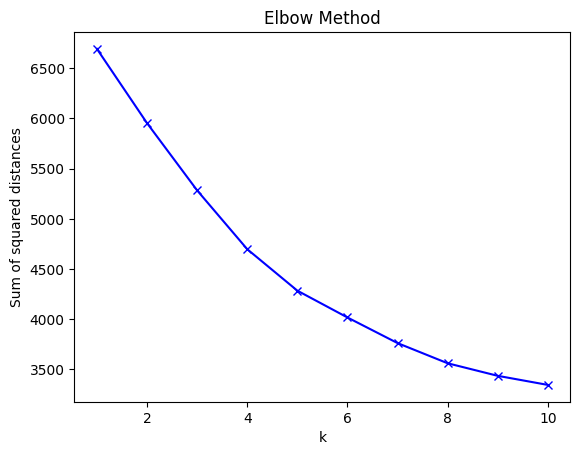

In [24]:
# Perform the elbow method to determine the optimal number of clusters
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In this case, I would consider that 5 clusters is a good option.

#### Silhouette analysis

c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

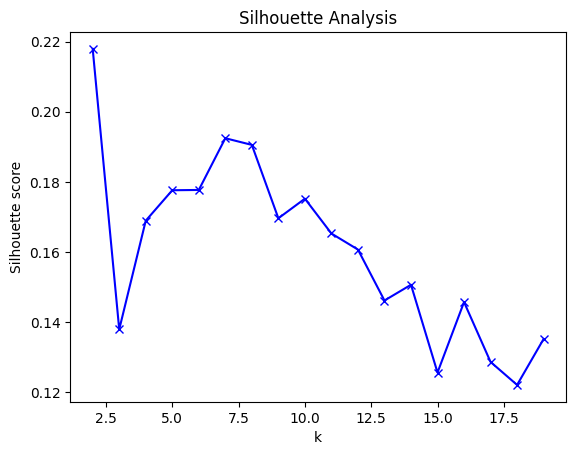

In [26]:
# Perform silhouette analysis to determine the optimal number of clusters
sil_scores = []
K = range(2, 20)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

According to the Silhouette Analysis, 7 and 8 clusters have the highest score of similarity among the elements of a cluster and disimilarity with elements of other clusters.

Then, based on both methods and looking for a reduced number of clusters,  6 clusters are going to be considered for the Kmeans analysis hereafter.

#### Training

In [80]:
num_clusters = 7
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)

c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Evaluation

In [286]:

# fit model and predict clusters
yhat = kmeanModel.fit(X)
yhat_2 = kmeanModel.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2085
Calinski Harabasz Score: 40.5402
Davies Bouldin Score: 1.5952


#### Clusters Visualization

##### Performing PCA dimensionality reduction

In [70]:
from sklearn.decomposition import PCA

In [71]:
# PCA to reduce the dimention to plot
pca = PCA(n_components=23, random_state=123)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

1.0


array([0.15503656, 0.27965564, 0.39259368, 0.46685515, 0.52360623,
       0.57848071, 0.627071  , 0.67341041, 0.71432351, 0.75304783,
       0.7896475 , 0.82406781, 0.85499019, 0.88349565, 0.90527656,
       0.92672451, 0.94381498, 0.96048194, 0.97174644, 0.9806522 ,
       0.98832266, 0.99465148, 1.        ])

C:\Users\Marco\AppData\Local\Temp\ipykernel_9868\2026839760.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,100,10), fontsize=12)


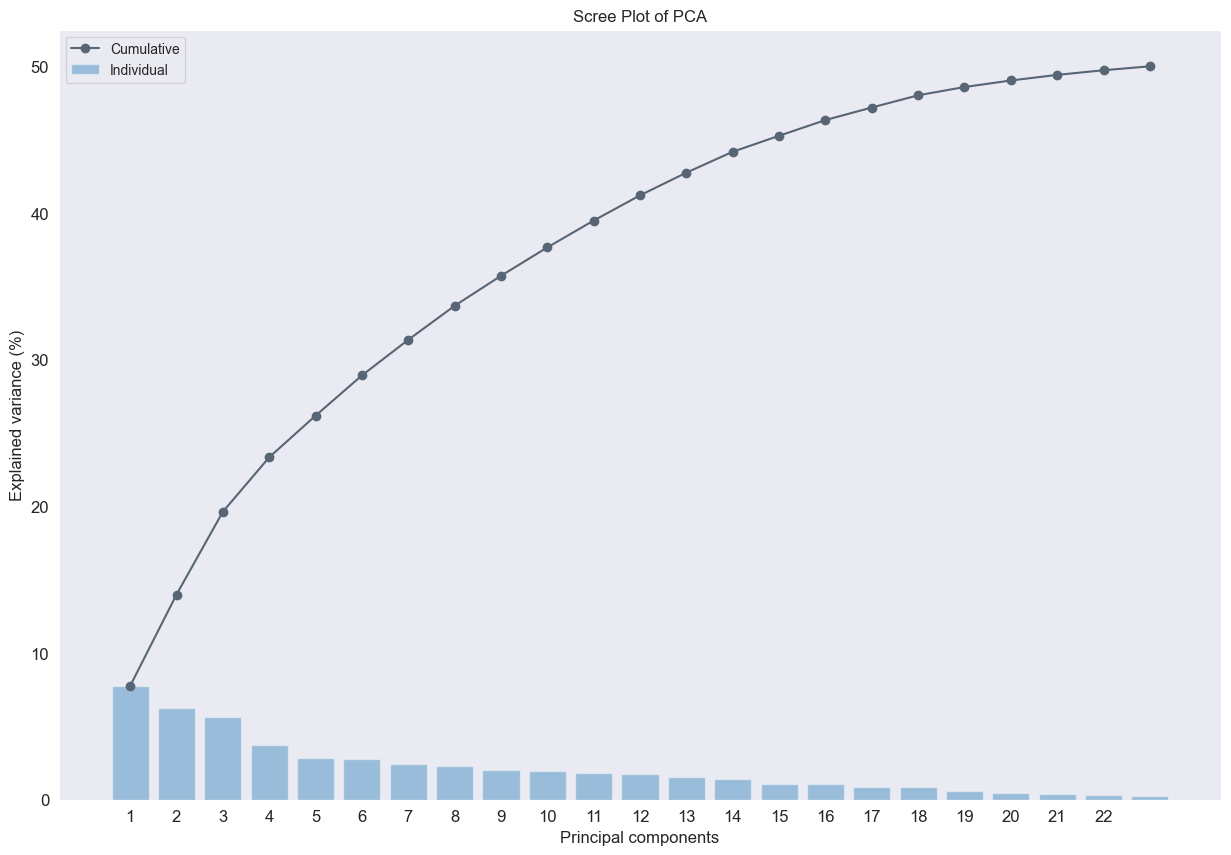

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum() , 
         label='Cumulative', color='#576574', axes=ax, marker='o')

ax.set_xticks(range(0,22))
ax.set_xticklabels(range(1,23), fontsize=12)
ax.set_yticklabels(range(0,100,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [73]:
pca = PCA(n_components=4, random_state=123)
pca_results = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3', 'PC4']
df_pca['label'] = kmeanModel.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,label
0,-0.864408,-2.623876,-1.811427,-0.122719,5
1,-4.560722,2.780968,-1.798302,-1.172890,3
2,-1.239387,-1.659311,-0.882545,1.393039,5
3,-1.050928,1.726085,-1.880846,-1.694617,3
4,1.403032,-0.029470,-0.685743,-0.178867,7


##### 2D plotting

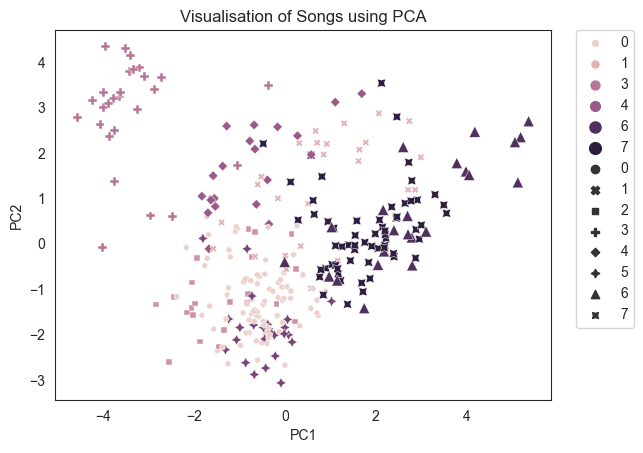

In [74]:
# 2D plotting
#p = ['#DC4E76', '#CC4B93', '#A946BE', '#5C4AE4', '#35375A', '#000000']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label',size="label")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

##### 3D Plotting

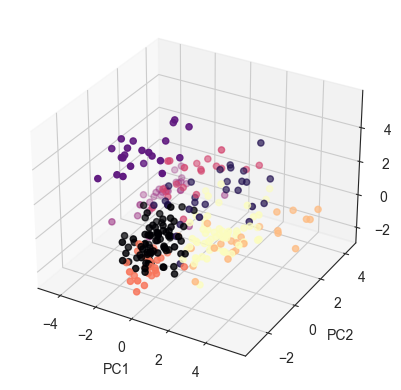

In [75]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap='magma')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

#### Plotting using t-Distributed Stochastic Neighbor Embedding

Here, we are going to use t-SNE to try to achieve a more meaningful representation in a lower dimensional space. Because, as we saw above, the PCA analysis is lossing a lot of information when only considering 2 or 3 dimensions.

t-SNE  works by modeling the similarity between pairs of high-dimensional data points and then representing those similarities in a lower-dimensional space.

 t-SNE algorithm starts by computing pairwise similarities between the high-dimensional data points, using a Gaussian kernel to measure the similarity between points. It then defines a probability distribution over pairs of points in the high-dimensional space, such that similar points have a higher probability of being selected than dissimilar points. Next, it defines a similar probability distribution over pairs of points in the lower-dimensional space, and it iteratively adjusts the positions of the points in the lower-dimensional space to minimize the difference between the two probability distributions.

The resulting lower-dimensional representation is optimized to preserve the pairwise similarities between the high-dimensional data points, while also minimizing the impact of the curse of dimensionality. This can be useful for visualizing high-dimensional data clusters, as it can reveal underlying patterns and relationships that may not be apparent in the original high-dimensional space.

In [55]:
from sklearn.manifold import TSNE

In [81]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=123, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [82]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,-7.487917,-4.082463,1
1,-4.429124,-10.964022,5
2,-6.958041,-2.077970,1
3,-4.243357,-7.660411,5
4,-2.020473,3.557866,2


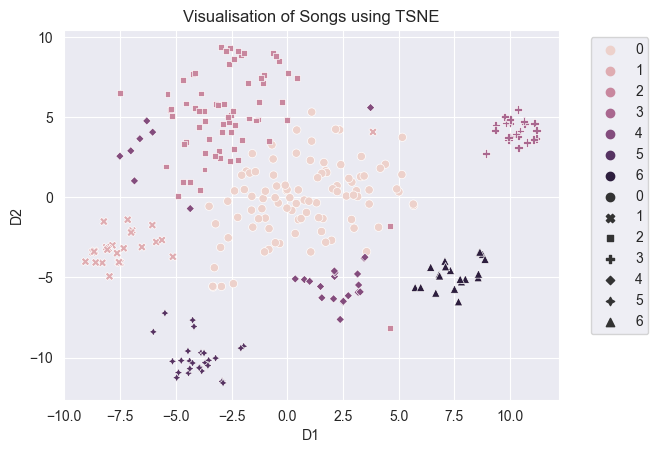

In [83]:
sns.set_style('darkgrid')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

#### Cluster Interpretation

##### Clusters distribution

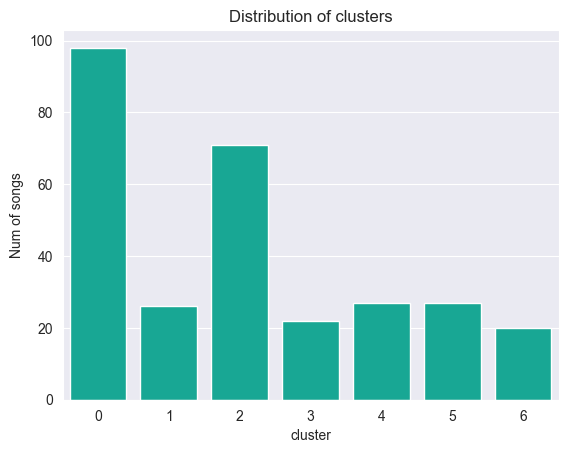

In [84]:
df.loc[:,'cluster'] = kmeanModel.labels_
artist_cluster_size = df.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= artist_cluster_size, x='cluster', y='Num of songs', color='#00BFA5')
plt.title('Distribution of clusters')
plt.show()

It can be seen that thre exist 2 dominant labels.

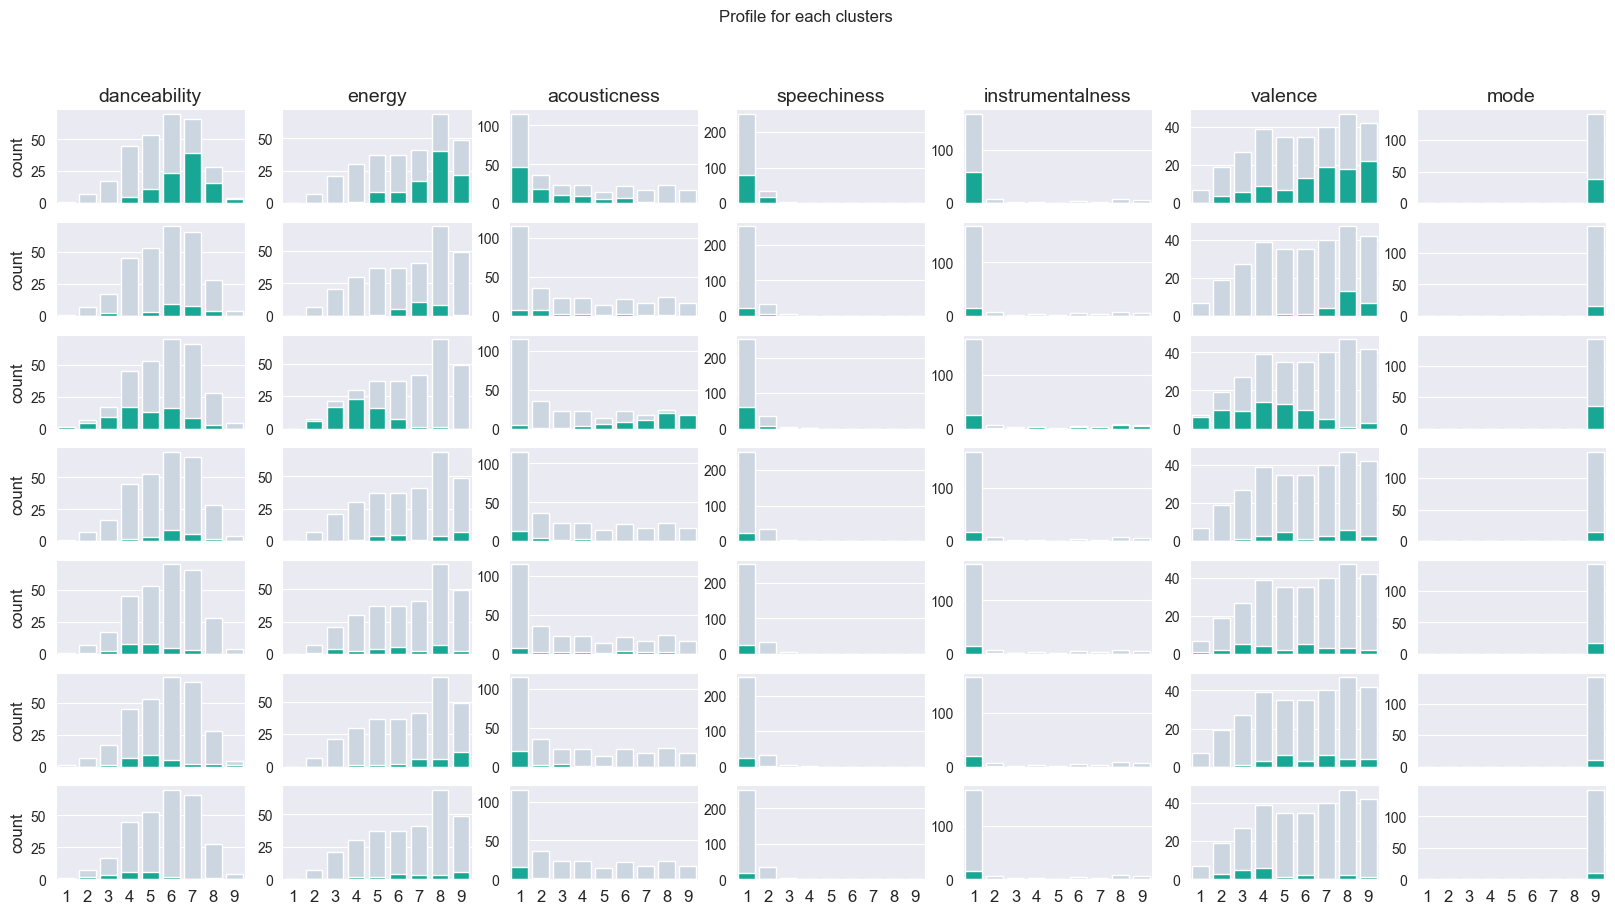

In [120]:
musical_features = ['danceability',
                    'energy', 
                    'acousticness',
                    'speechiness', 
                    'instrumentalness',
                    'valence',
                    'mode']

# set binning intervals of 0.1
bins = np.linspace(0, 1, 10)

# create subplots
num_features = len(musical_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df['cluster'].unique()):
    # filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df[df['cluster'] == cluster]
    col = 0
    
    for feature in musical_features:
        # create binned count for all recent df and clustered df
        rec_grp = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
        # plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='#c8d6e5', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='#00BFA5', ax=axes[row, col])
        
        # configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1, 10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)
        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [121]:
radar_col = musical_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,danceability,energy,acousticness,speechiness,instrumentalness,valence,mode
0,0,0.676735,0.784143,0.191473,0.068342,0.038289,0.683602,0.397959
1,1,0.646308,0.744692,0.287773,0.078415,0.001281,0.823885,0.576923
2,2,0.488944,0.404930,0.706595,0.069054,0.223856,0.422325,0.507042
3,3,0.631636,0.723682,0.128040,0.041832,0.036925,0.651727,0.681818
4,4,0.482148,0.601926,0.376571,0.052656,0.023474,0.517267,0.629630
5,5,0.548778,0.806963,0.084097,0.060004,0.014950,0.660593,0.370370
6,6,0.424400,0.722900,0.074615,0.063415,0.012103,0.422750,0.500000


In [106]:
# group the tracks by cluster label and get the top track for each cluster based on song_popularity
top_tracks = df.groupby('cluster').apply(lambda x: x.loc[x['song_popularity'].idxmax()])[['song_name', 'artist']]

# print the top track for each cluster
for cluster in np.sort(df['cluster'].unique()):
    cluster_name = f'Cluster {cluster}'
    print(f'Top track for {cluster_name}:')
    print(top_tracks.loc[cluster])
    print()

Top track for Cluster 0:
song_name    I'm Good (Blue)
artist          David Guetta
Name: 0, dtype: object

Top track for Cluster 1:
song_name    No Te Creas Tan Importante - En Vivo
artist                               Damas Gratis
Name: 1, dtype: object

Top track for Cluster 2:
song_name    My Heart Will Go On - Love Theme from "Titanic"
artist                                           Céline Dion
Name: 2, dtype: object

Top track for Cluster 3:
song_name    Girls Just Want to Have Fun
artist                      Cyndi Lauper
Name: 3, dtype: object

Top track for Cluster 4:
song_name    Africa
artist         TOTO
Name: 4, dtype: object

Top track for Cluster 5:
song_name    Persiana Americana - Remasterizado 2007
artist                                   Soda Stereo
Name: 5, dtype: object

Top track for Cluster 6:
song_name    Livin' On A Prayer
artist                 Bon Jovi
Name: 6, dtype: object



+ Cluster 1: It's Party Time.
+ Cluster 2: Cumbia Argenta
+ Cluster 3: Sad and Moody
+ Cluster 4: 80s Anthems
+ Cluster 5  Rock Classics
+ Cluster 6: Rock del nuestro
+ Clsuter 7: It's getting heavier

In [123]:
df_party = df[df['cluster']==0].sort_values('song_popularity', ascending=False)
df_party.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
284,I'm Good (Blue),David Guetta,I'm Good (Blue),0.561,0.965,7,-3.673,0,0.0343,0.00383,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
157,The Real Slim Shady,Eminem,The Marshall Mathers LP,0.949,0.661,5,-4.244,0,0.0572,0.03020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
265,"Villano Antillano: Bzrp Music Sessions, Vol. 51",Bizarrap,"Villano Antillano: Bzrp Music Sessions, Vol. 51",0.820,0.752,1,-7.635,0,0.0648,0.05840,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
243,Señorita,Shawn Mendes,Shawn Mendes (Deluxe),0.759,0.548,9,-6.049,0,0.0290,0.03920,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
287,Rasputin,Majestic,Rasputin,0.758,0.913,6,-2.926,0,0.1130,0.00364,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [124]:
df_cumbia = df[df['cluster']==1].sort_values('song_popularity', ascending=False)
df_cumbia.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
76,No Te Creas Tan Importante - En Vivo,Damas Gratis,No Te Creas Tan Importante (En Vivo),0.302,0.758,5,-5.273,1,0.0424,0.202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
152,Se Parece Más A Ti,Jambao,Separece A Ti,0.686,0.776,1,-3.601,1,0.0837,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
85,Conmigo Te Gustó,Leo Mattioli,En Directo - Piel Con Piel,0.317,0.904,6,-5.686,0,0.1640,0.506,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
260,La Cola,Los Palmeras,Tiempo De Bailar,0.778,0.790,9,-5.024,0,0.0601,0.355,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
90,Nunca me Faltes,Antonio Rios,El Maestro,0.767,0.702,4,-5.952,0,0.0316,0.157,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [125]:
df_moody = df[df['cluster']==2].sort_values('song_popularity', ascending=False)
df_moody.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
281,"My Heart Will Go On - Love Theme from ""Titanic""",Céline Dion,Let's Talk About Love,0.428,0.276,4,-11.729,1,0.0312,0.7320,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
220,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,"Bach: Cello Suites Nos. 1, 5 & 6",0.275,0.157,7,-18.752,1,0.0636,0.8900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
210,Vivaldi Variation (Arr. for Piano from Concert...,Antonio Vivaldi,Vivaldi Variation (Arr. for Piano from Concert...,0.429,0.258,7,-16.967,0,0.0549,0.9570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
197,He's a Pirate,Klaus Badelt,Pirates of the Caribbean: The Curse of the Bla...,0.465,0.687,10,-10.964,1,0.0495,0.0206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
132,"Non, je ne regrette rien",Édith Piaf,Eternelle,0.382,0.354,7,-6.595,1,0.0289,0.8580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [126]:
df_80s = df[df['cluster']==3].sort_values('song_popularity', ascending=False)
df_80s.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
190,Girls Just Want to Have Fun,Cyndi Lauper,She's So Unusual,0.710,0.799,6,-4.897,1,0.0328,0.220000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3
148,Believe,Cher,Believe,0.652,0.917,6,-6.720,1,0.0548,0.008200,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3
112,Wonderwall - Remastered,Oasis,(What's The Story) Morning Glory? [Remastered],0.378,0.896,2,-4.066,1,0.0407,0.000452,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
87,Call Me,Blondie,Atomic/Atomix,0.560,0.825,2,-6.711,0,0.0347,0.000785,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3
97,Forever Young,Alphaville,Forever Young,0.489,0.483,9,-9.466,0,0.0275,0.420000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3


In [128]:
df_rock = df[df['cluster']==4].sort_values('song_popularity', ascending=False)
df_rock.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
78,Africa,TOTO,Toto IV,0.671,0.373,9,-18.064,1,0.0323,0.25700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
215,Don't Stop Me Now - Remastered 2011,Queen,Jazz (2011 Remaster),0.559,0.868,5,-5.276,1,0.1700,0.04750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
45,"Paint It, Black",The Rolling Stones,Aftermath,0.464,0.795,1,-9.267,1,0.0926,0.04930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
118,More Than a Feeling,Boston,Boston,0.377,0.681,7,-8.039,1,0.0298,0.00088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
182,Dust in the Wind,Kansas,Point Of Know Return (Expanded Edition),0.475,0.322,7,-10.687,1,0.0283,0.36700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [129]:
df_argrock = df[df['cluster']==5].sort_values('song_popularity', ascending=False)
df_argrock.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
179,Persiana Americana - Remasterizado 2007,Soda Stereo,Signos (Remastered),0.603,0.929,4,-4.549,0,0.0407,0.012100,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
16,Balada Del Diablo y La Muerte,La Renga,Despedazado Por Mil Partes,0.406,0.771,4,-6.991,0,0.0562,0.128000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
114,Ji Ji Ji,Patricio Rey y sus Redonditos de Ricota,Oktubre,0.476,0.706,5,-10.136,1,0.2170,0.004700,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
237,Yo Te Diré,Miranda!,El Templo del Pop,0.917,0.980,11,-4.087,0,0.0382,0.004720,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
88,Mujer Amante - Vivo,Rata Blanca,"XX Aniversario En Vivo - Magos, Espadas Y Rosas",0.508,0.878,10,-5.971,0,0.0361,0.000021,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5


In [131]:
df_heavier = df[df['cluster']==6].sort_values('song_popularity', ascending=False)
df_heavier.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
93,Livin' On A Prayer,Bon Jovi,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.077800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
253,Under the Bridge,Red Hot Chili Peppers,Blood Sugar Sex Magik (Deluxe Edition),0.559,0.345,4,-13.496,1,0.0459,0.057600,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
250,Californication,Red Hot Chili Peppers,Californication (Deluxe Edition),0.592,0.767,9,-2.788,0,0.0270,0.002100,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
252,Snow (Hey Oh),Red Hot Chili Peppers,Stadium Arcadium,0.427,0.900,11,-3.674,1,0.0499,0.116000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
46,Paranoid,Black Sabbath,Paranoid (2009 Remastered Version),0.429,0.631,4,-11.514,0,0.0769,0.000078,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6


In [138]:
from math import pi, ceil

def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(3,ceil(num_clusters/3),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

C:\Users\Marco\AppData\Local\Temp\ipykernel_9868\1472412958.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))


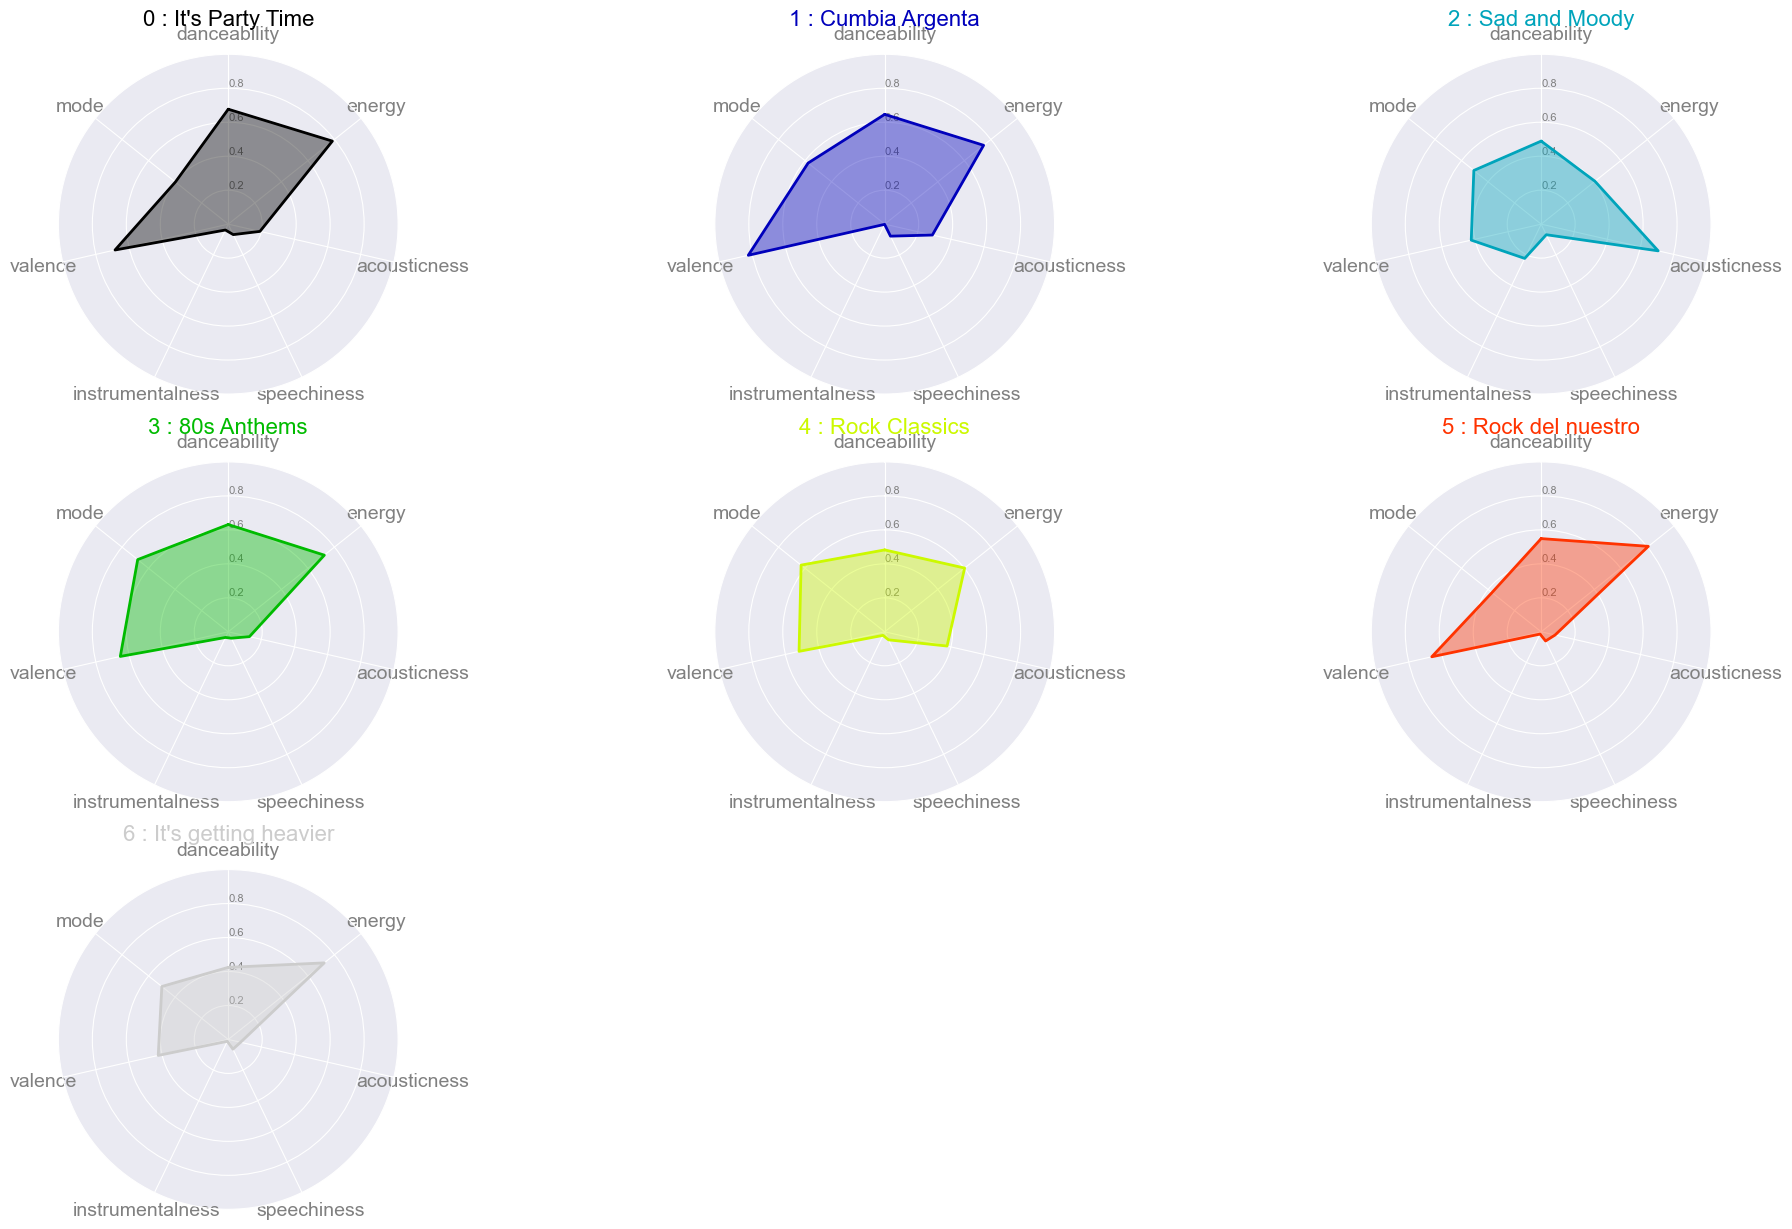

In [139]:
  # initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B', '#FF0000'
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))

# Create cluster name
title_list = ["It's Party Time",
              "Cumbia Argenta",
              "Sad and Moody",
              "80s Anthems",
              "Rock Classics",
              "Rock del nuestro",
              "It's getting heavier"]

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

### Agglomerative clustering

Agglomerative clustering is a general family of clustering algorithms that build nested clusters by merging data points successively. 

There are multiple options for linking data points in a successive manner:

+ Single linkage: It minimizes the distance between the closest observations of pairs of clusters
+ Complete or Maximum linkage: Tries to minimize the maximum distance between observations of pairs of clusters
+ Average linkage: It minimizes the average of the distances between all observations of pairs of clusters
+ Ward: Similar to the k-means as it minimizes the sum of squared differences within all clusters but with a hierarchical approach. We will be using this option in our exercise.

#### Defining the number of clusters

##### Dendrogram

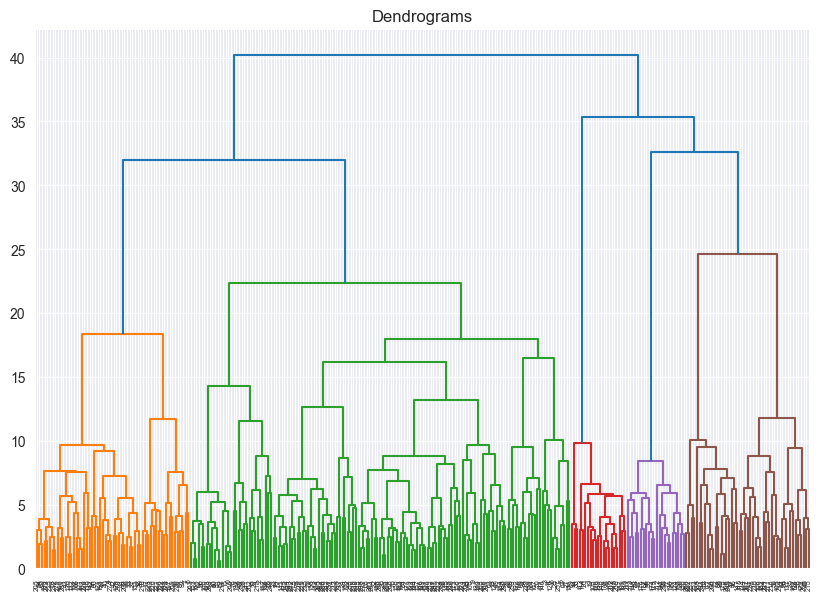

In [245]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

From the dendrogram, we could use 8 or 5 clusters.

##### Elbow method for AgglomerativeClustering

In [249]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

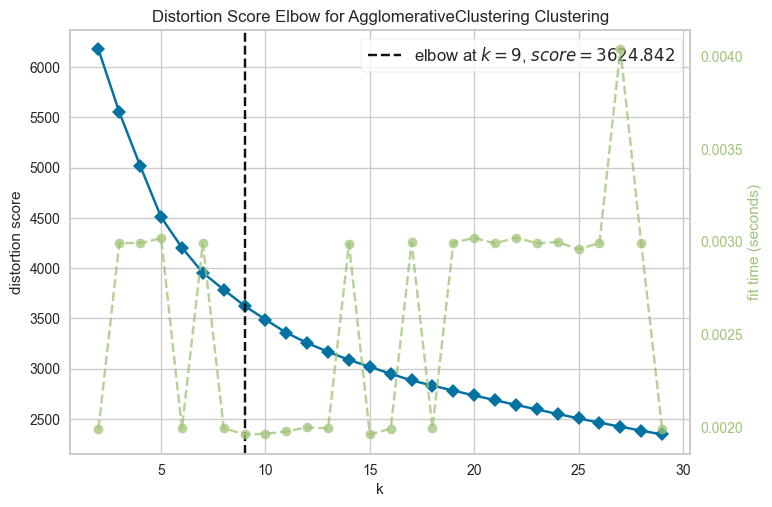

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [257]:
# Elbow Method for K means

model = AgglomerativeClustering(linkage= 'ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show() 

From the Elbow method we get a value of 9.

##### Silhouette analysis

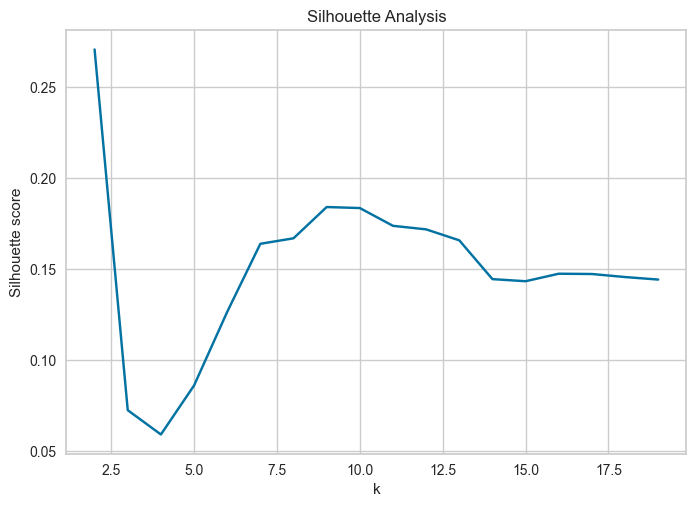

In [262]:
# Perform silhouette analysis to determine the optimal number of clusters
sil_scores = []
K = range(2, 20)
for k in K:
    AC = AgglomerativeClustering(n_clusters=k,
                                 linkage= 'complete' )
    AC.fit(X)
    sil_scores.append(silhouette_score(X, AC.labels_))

plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

The silhoutte analysis indicates different k's depending on the linkage parameter:

+ ward: 6
+ single : 13 
+ complete : 9
+ average : 8


Then, considering an average case, 8 clusters are considered hereafter.

#### Train and Evaluation



In [261]:

# define the model
model = AgglomerativeClustering(n_clusters=8)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1738
Calinski Harabasz Score: 34.1524
Davies Bouldin Score: 1.7224


### Cluster Visualization

#### t-SNE

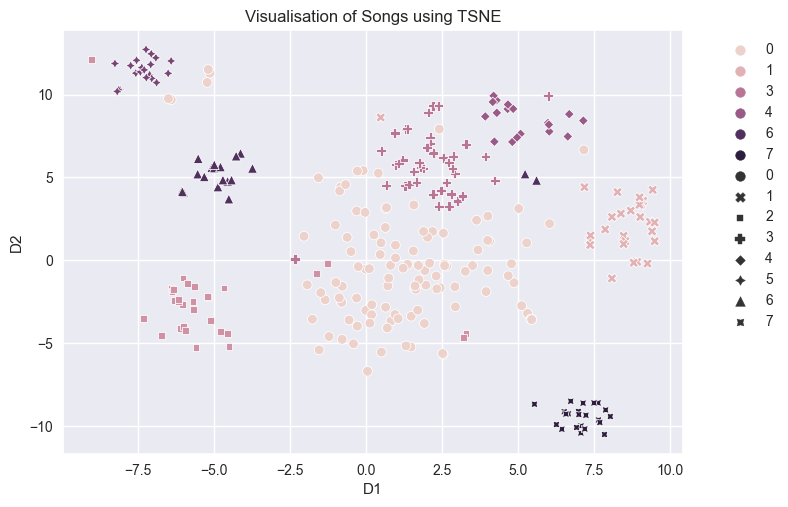

In [263]:
# Define the t-SNE transformer
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=123, learning_rate=190)
tsne_results = tsne.fit_transform(X)

# Prepare the df
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = model.labels_


# Plot
sns.set_style('darkgrid')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

From the above plot, there exist some overlapping of the clusters, however, most of them seem to be more clearly defined compared to the previous case using Kmeans.

#### Cluster Interpretation

##### Cluster Distribution

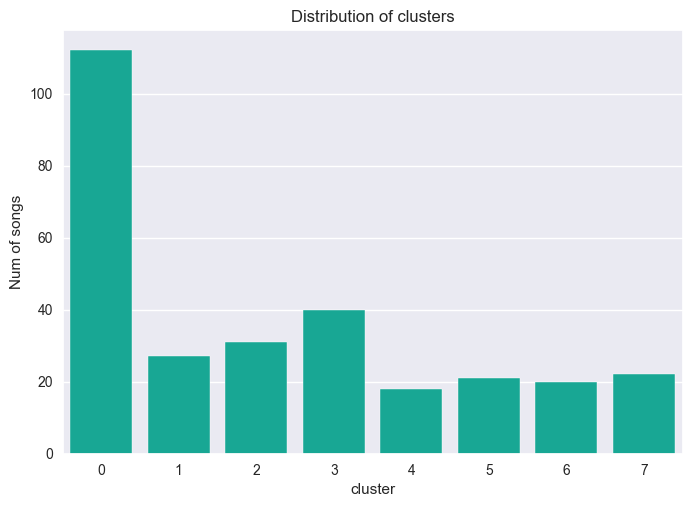

In [264]:
df.loc[:,'cluster'] = model.labels_
artist_cluster_size = df.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= artist_cluster_size, x='cluster', y='Num of songs', color='#00BFA5')
plt.title('Distribution of clusters')
plt.show()

However, we now have one predominant cluster.

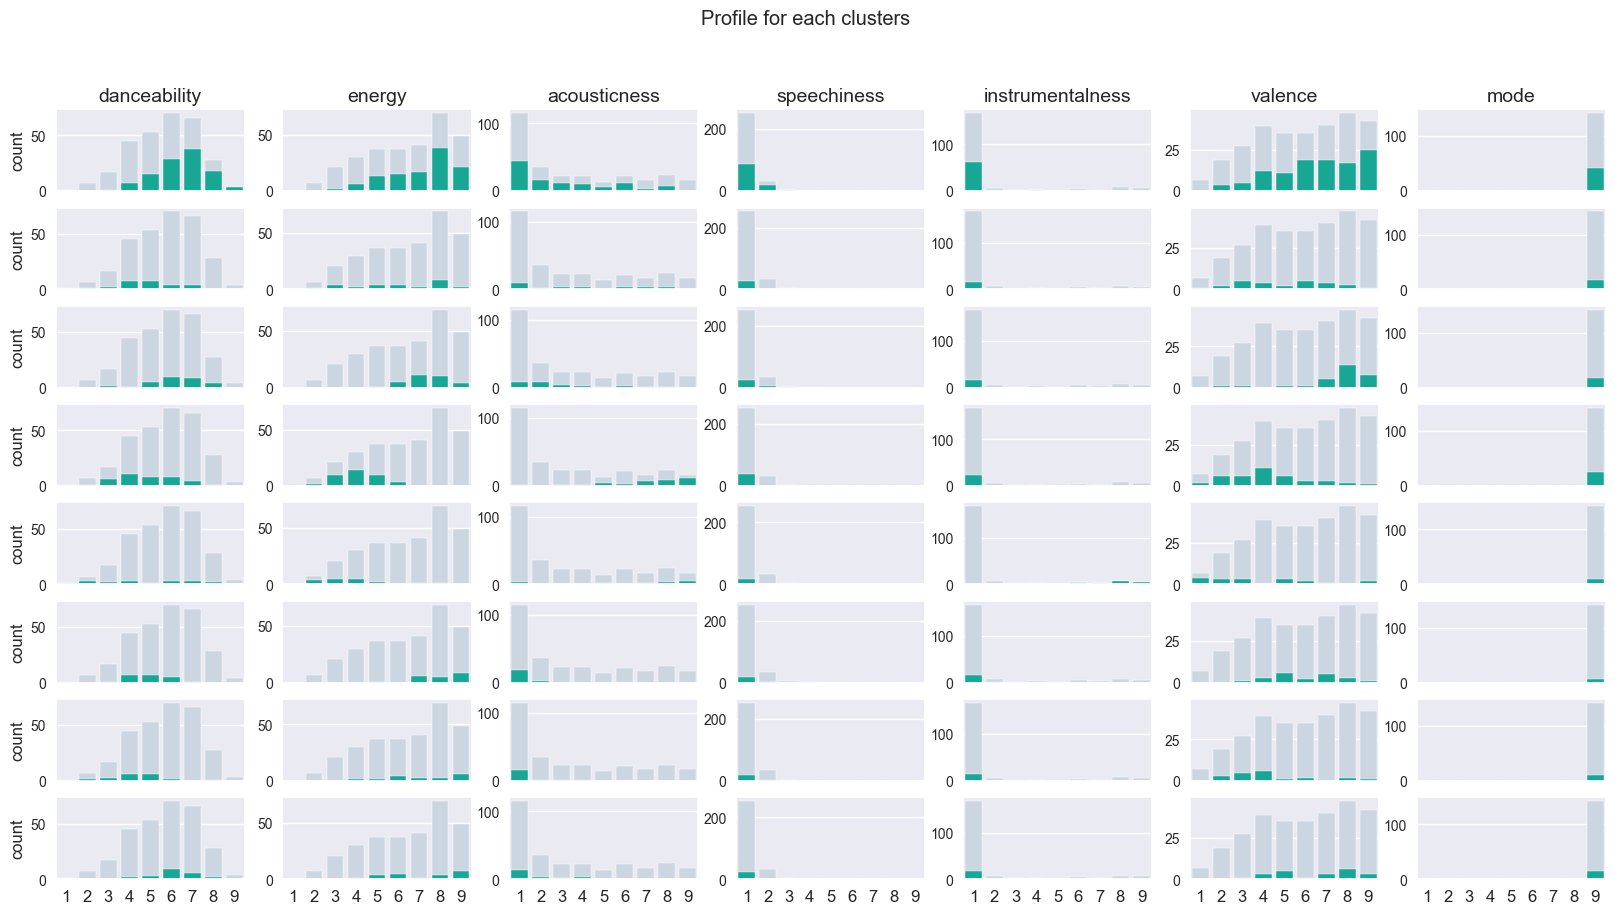

In [266]:
musical_features = ['danceability',
                    'energy', 
                    'acousticness',
                    'speechiness', 
                    'instrumentalness',
                    'valence',
                    'mode']
num_clusters = 8

# set binning intervals of 0.1
bins = np.linspace(0, 1, 10)

# create subplots
num_features = len(musical_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df['cluster'].unique()):
    # filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df[df['cluster'] == cluster]
    col = 0
    
    for feature in musical_features:
        # create binned count for all recent df and clustered df
        rec_grp = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
        # plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='#c8d6e5', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='#00BFA5', ax=axes[row, col])
        
        # configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1, 10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)
        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [267]:
radar_col = musical_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,danceability,energy,acousticness,speechiness,instrumentalness,valence,mode
0,0,0.666312,0.734732,0.265082,0.077680,0.039004,0.671866,0.375000
1,1,0.485815,0.610926,0.357326,0.044722,0.023499,0.510859,0.629630
2,2,0.622806,0.771548,0.262632,0.079226,0.001083,0.787000,0.548387
3,3,0.489475,0.404225,0.737200,0.047683,0.025774,0.417538,0.625000
4,4,0.473000,0.372500,0.628903,0.063167,0.792222,0.395978,0.500000
5,5,0.501429,0.829571,0.026948,0.060614,0.018544,0.615857,0.333333
6,6,0.424400,0.722900,0.074615,0.063415,0.012103,0.422750,0.500000
7,7,0.631636,0.723682,0.128040,0.041832,0.036925,0.651727,0.681818


##### Interpreting Clusters 

From a snapshot of the most popular songs in each clusters, we can define the following groups:

+ Cluster 1: It's party time: similar to the Cluster 1 obtained from KMeans.
+ Cluster 2: Upligting Rock : 
+ Cluster 3: Hits Argentos : Similar to the Cluster 2 obtained from KMeans.
+ Cluster 4: Sad and Moody: Similar to the Cluster 3 obtained from KMeans.
+ Cluster 5: Soundtracks : Epic and orchestrations.
+ Cluster 6: Rock del Nuestro: Argentine Rock and Metal tracks.
+ Cluster 7: Hard Rock: Similar to the Cluster 7 obtained from KMeans.
+ Cluster 8: 80s Anthems : Similar to the Cluster 4 obtained from KMeans.


In [269]:
df_partyAC = df[df['cluster']==0].sort_values('song_popularity', ascending=False)
df_partyAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
284,I'm Good (Blue),David Guetta,I'm Good (Blue),0.561,0.965,7,-3.673,0,0.0343,0.00383,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
157,The Real Slim Shady,Eminem,The Marshall Mathers LP,0.949,0.661,5,-4.244,0,0.0572,0.03020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
265,"Villano Antillano: Bzrp Music Sessions, Vol. 51",Bizarrap,"Villano Antillano: Bzrp Music Sessions, Vol. 51",0.820,0.752,1,-7.635,0,0.0648,0.05840,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
243,Señorita,Shawn Mendes,Shawn Mendes (Deluxe),0.759,0.548,9,-6.049,0,0.0290,0.03920,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
287,Rasputin,Majestic,Rasputin,0.758,0.913,6,-2.926,0,0.1130,0.00364,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [271]:
df_upRockAC = df[df['cluster']==1].sort_values('song_popularity', ascending=False)
df_upRockAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
78,Africa,TOTO,Toto IV,0.671,0.373,9,-18.064,1,0.0323,0.25700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
215,Don't Stop Me Now - Remastered 2011,Queen,Jazz (2011 Remaster),0.559,0.868,5,-5.276,1,0.1700,0.04750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
45,"Paint It, Black",The Rolling Stones,Aftermath,0.464,0.795,1,-9.267,1,0.0926,0.04930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
118,More Than a Feeling,Boston,Boston,0.377,0.681,7,-8.039,1,0.0298,0.00088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
182,Dust in the Wind,Kansas,Point Of Know Return (Expanded Edition),0.475,0.322,7,-10.687,1,0.0283,0.36700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [272]:
df_cumbiaAC = df[df['cluster']==2].sort_values('song_popularity', ascending=False)
df_cumbiaAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
76,No Te Creas Tan Importante - En Vivo,Damas Gratis,No Te Creas Tan Importante (En Vivo),0.302,0.758,5,-5.273,1,0.0424,0.202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
152,Se Parece Más A Ti,Jambao,Separece A Ti,0.686,0.776,1,-3.601,1,0.0837,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
85,Conmigo Te Gustó,Leo Mattioli,En Directo - Piel Con Piel,0.317,0.904,6,-5.686,0,0.1640,0.506,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
188,Amor Clasificado,Rodrigo,Soy Cordobes,0.462,0.928,9,-6.090,1,0.0453,0.272,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
260,La Cola,Los Palmeras,Tiempo De Bailar,0.778,0.790,9,-5.024,0,0.0601,0.355,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [274]:
df_SadMoodyAC = df[df['cluster']==3].sort_values('song_popularity', ascending=False)
df_SadMoodyAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
281,"My Heart Will Go On - Love Theme from ""Titanic""",Céline Dion,Let's Talk About Love,0.428,0.276,4,-11.729,1,0.0312,0.732,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
142,Cheri Cheri Lady,Modern Talking,Let's Talk About Love,0.677,0.616,10,-13.826,1,0.0320,0.458,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
132,"Non, je ne regrette rien",Édith Piaf,Eternelle,0.382,0.354,7,-6.595,1,0.0289,0.858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
212,Husavik (My Hometown),Will Ferrell,Eurovision Song Contest: The Story of Fire Sag...,0.509,0.460,6,-8.474,1,0.0335,0.523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
130,La vie en rose,Édith Piaf,de l'accordeoniste a milord,0.390,0.302,8,-8.687,1,0.0321,0.984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [276]:
df_soundtracksAC = df[df['cluster']==4].sort_values('song_popularity', ascending=False)
df_soundtracksAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
220,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,"Bach: Cello Suites Nos. 1, 5 & 6",0.275,0.157,7,-18.752,1,0.0636,0.8900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
210,Vivaldi Variation (Arr. for Piano from Concert...,Antonio Vivaldi,Vivaldi Variation (Arr. for Piano from Concert...,0.429,0.258,7,-16.967,0,0.0549,0.9570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
197,He's a Pirate,Klaus Badelt,Pirates of the Caribbean: The Curse of the Bla...,0.465,0.687,10,-10.964,1,0.0495,0.0206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
213,Conquest of Paradise,Vangelis,1492: Conquest of Paradise,0.430,0.295,2,-14.255,1,0.0283,0.6980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
196,Arrival to Earth,Steve Jablonsky,Transformers: The Score,0.103,0.384,0,-16.401,0,0.0556,0.5490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [278]:
df_RockArgentoAC = df[df['cluster']==5].sort_values('song_popularity', ascending=False)
df_RockArgentoAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
179,Persiana Americana - Remasterizado 2007,Soda Stereo,Signos (Remastered),0.603,0.929,4,-4.549,0,0.0407,0.012100,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
16,Balada Del Diablo y La Muerte,La Renga,Despedazado Por Mil Partes,0.406,0.771,4,-6.991,0,0.0562,0.128000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
114,Ji Ji Ji,Patricio Rey y sus Redonditos de Ricota,Oktubre,0.476,0.706,5,-10.136,1,0.2170,0.004700,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
88,Mujer Amante - Vivo,Rata Blanca,"XX Aniversario En Vivo - Magos, Espadas Y Rosas",0.508,0.878,10,-5.971,0,0.0361,0.000021,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5
1,Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,0.543,0.962,4,-5.337,0,0.1060,0.027400,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5


In [282]:
df_heavierAC = df[df['cluster']==6].sort_values('song_popularity', ascending=False)
df_heavierAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
93,Livin' On A Prayer,Bon Jovi,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.077800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
253,Under the Bridge,Red Hot Chili Peppers,Blood Sugar Sex Magik (Deluxe Edition),0.559,0.345,4,-13.496,1,0.0459,0.057600,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
250,Californication,Red Hot Chili Peppers,Californication (Deluxe Edition),0.592,0.767,9,-2.788,0,0.0270,0.002100,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
252,Snow (Hey Oh),Red Hot Chili Peppers,Stadium Arcadium,0.427,0.900,11,-3.674,1,0.0499,0.116000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6
46,Paranoid,Black Sabbath,Paranoid (2009 Remastered Version),0.429,0.631,4,-11.514,0,0.0769,0.000078,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6


In [284]:
df_80sAC = df[df['cluster']==7].sort_values('song_popularity', ascending=False)
df_80sAC.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,pop,latin,argentine,wave,new,cumbia,metal,classic,espanol,cluster
190,Girls Just Want to Have Fun,Cyndi Lauper,She's So Unusual,0.710,0.799,6,-4.897,1,0.0328,0.220000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7
148,Believe,Cher,Believe,0.652,0.917,6,-6.720,1,0.0548,0.008200,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7
112,Wonderwall - Remastered,Oasis,(What's The Story) Morning Glory? [Remastered],0.378,0.896,2,-4.066,1,0.0407,0.000452,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
87,Call Me,Blondie,Atomic/Atomix,0.560,0.825,2,-6.711,0,0.0347,0.000785,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7
97,Forever Young,Alphaville,Forever Young,0.489,0.483,9,-9.466,0,0.0275,0.420000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7


##### Radars

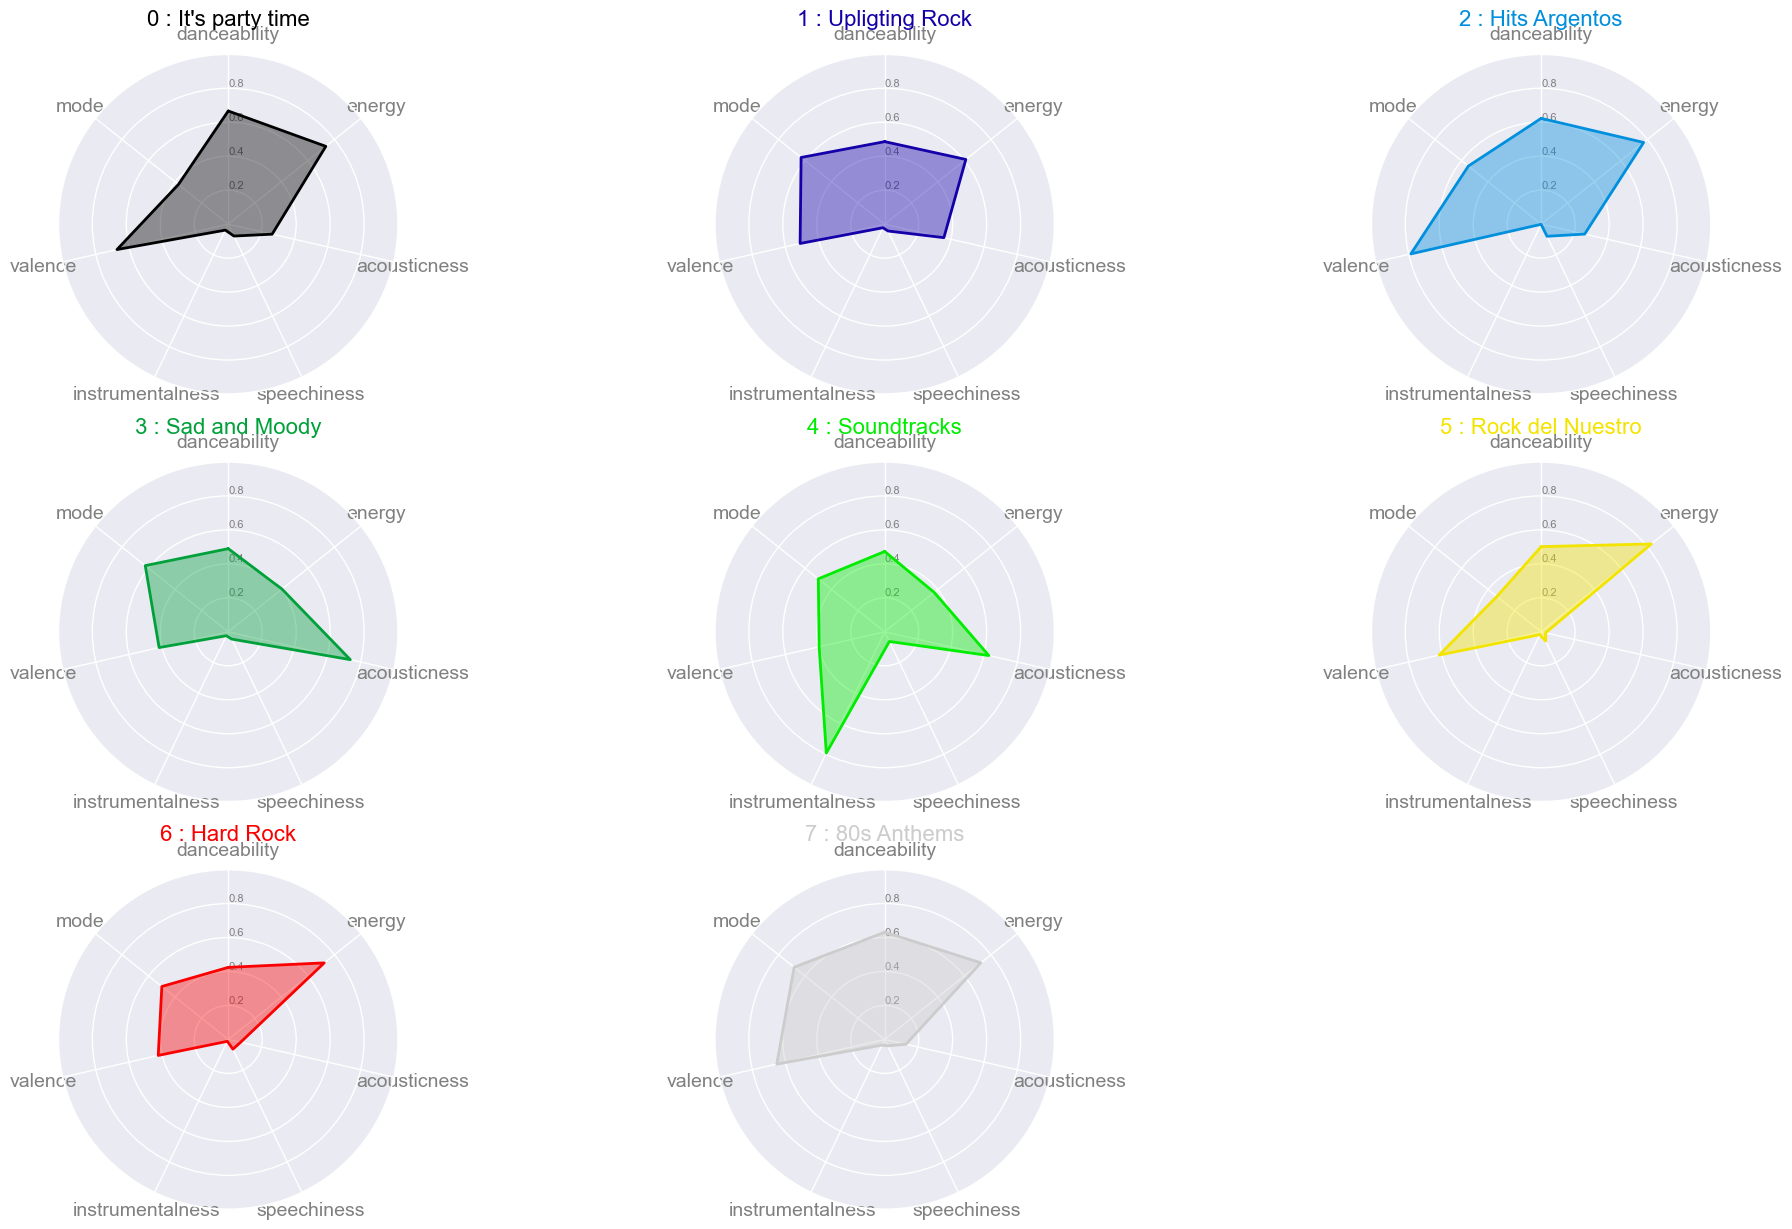

In [285]:
  # initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B', '#FF0000'
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))

# Create cluster name
title_list = ["It's party time",
              "Upligting Rock",
              "Hits Argentos",
              "Sad and Moody",
              "Soundtracks",
              "Rock del Nuestro",
              "Hard Rock",
              "80s Anthems"
              ]

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

## Conclusions

Both Clustering methods performed properly identifing groups of tracks that were similar, even being able to discriminate between genres that are musically quite similar like "hard rock" and "argentine rock/metal".

There were several similarities in the grouping performed by both methods:

1. Both defined a dominant group including the tracks of "It's party Time" group, which are song belonging to mainstream genres like EDM and Pop and urban styles like hip hop, trap, and similars.
2. Both defined a group including classic popular genres from Argentina, like cumbia villera and similar styles.
3. Both identify a group of tracks characterized by sad and moody vibes, high acousticness and low energy.
4. Both defined a group with mostly tracks in english language from the 80s or thereabouts.
5. Both identified a group of tracks consisting on mostly metal and rock songs in spanish, characterized by bands like La Renga, Patricio Rey, Rata Blanca,etc.
6. Both were able to distinguish between the above group and a cluster containing american or british bands like Black Sabbath, Red Hot Chili Peppers, etc which is worth to be mentioned since from a musical perspective both groups refer to heavier music with similar instruments and productions.

However, agglomerative clustering performs slightly better than KMeans.

1. It was able to identify a cluster consisting on movies soundtrack. Which are rich in orchestrations and have few to no spoken words.
2. The Sad and Moody cluster is more solid from a musical perspective since it no longer includes classic music tracks like the Bach's suites and Vivaldi concerts.

This second interpretation from a musical or user-friendly perspective is important, since based solely on the Evaluation scores, the KMeans method seems a slightly better model.

